# Calories Burnt Prediction

## Import dependencies

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [5]:
calories = pd.read_csv('../data/calories.csv')
exercise = pd.read_csv('../data/exercise.csv')

calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [7]:
exercise.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


## Data preprocessing

In [12]:
### Combine the two data using `pd.merge` 

combined_data = pd.merge(exercise, calories, on='User_ID')

In [14]:
combined_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [16]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [18]:
combined_data.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

## Statistical distribution

In [23]:
# remove `User_ID` column

combined_data = combined_data.drop(columns='User_ID', axis=1)

combined_data.describe()

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [31]:
correlation_data = combined_data.drop(columns='Gender', axis=1)

correlation_matrix = correlation_data.corr()

print(correlation_matrix)

                 Age    Height    Weight  Duration  Heart_Rate  Body_Temp  \
Age         1.000000  0.009554  0.090094  0.013247    0.010482   0.013175   
Height      0.009554  1.000000  0.958451 -0.004625    0.000528   0.001200   
Weight      0.090094  0.958451  1.000000 -0.001884    0.004311   0.004095   
Duration    0.013247 -0.004625 -0.001884  1.000000    0.852869   0.903167   
Heart_Rate  0.010482  0.000528  0.004311  0.852869    1.000000   0.771529   
Body_Temp   0.013175  0.001200  0.004095  0.903167    0.771529   1.000000   
Calories    0.154395  0.017537  0.035481  0.955421    0.897882   0.824558   

            Calories  
Age         0.154395  
Height      0.017537  
Weight      0.035481  
Duration    0.955421  
Heart_Rate  0.897882  
Body_Temp   0.824558  
Calories    1.000000  


In [33]:
sns.set()

### Distribution of the Numerical features

Text(0.5, 1.0, 'Age distribution')

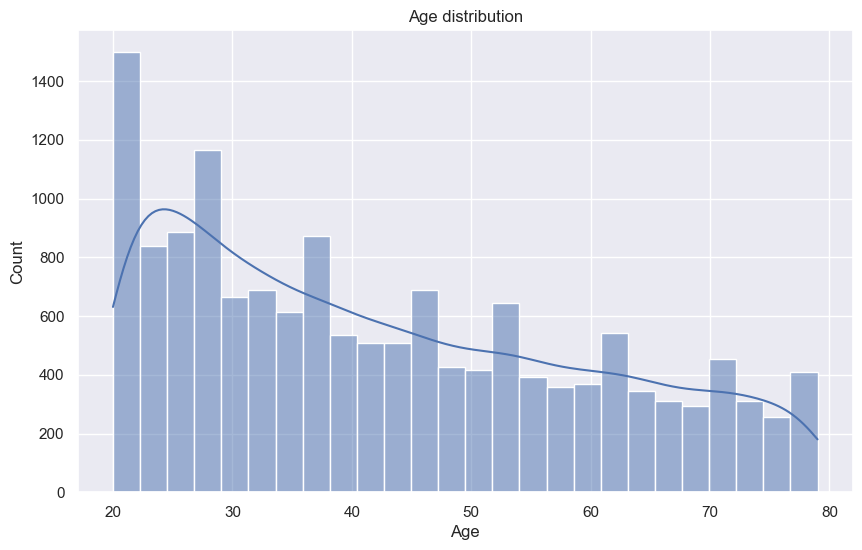

In [55]:
# distribution based on their `Age`

plt.figure(figsize=(10,6))
# sns.distplot(combined_data['Age'], hist=True, kde=True)
sns.histplot(combined_data['Age'], kde=True)
plt.title('Age distribution')
# sns.kdeplot(combined_data['Age'])

Text(0.5, 1.0, 'Height distribution')

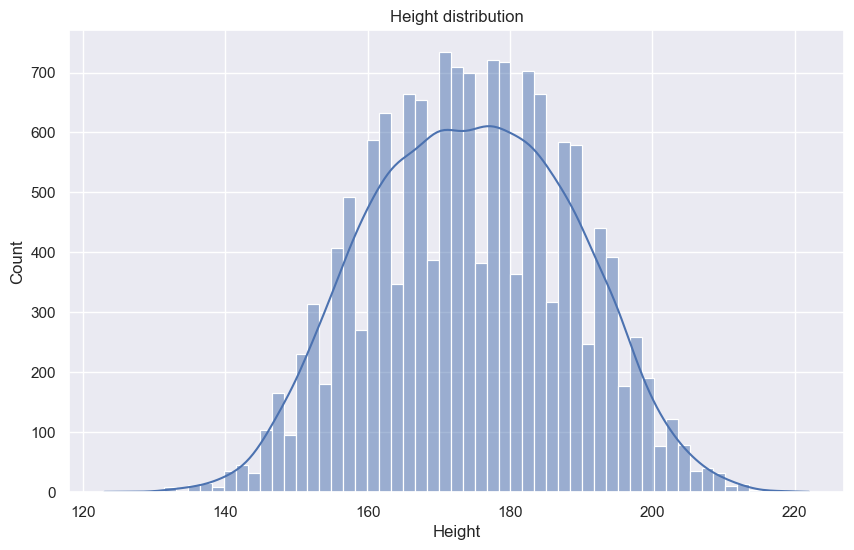

In [59]:
# distribution based on their `Height`

plt.figure(figsize=(10,6))
sns.histplot(combined_data['Height'], kde=True)
plt.title('Height distribution')


Text(0.5, 1.0, 'Weight distribution')

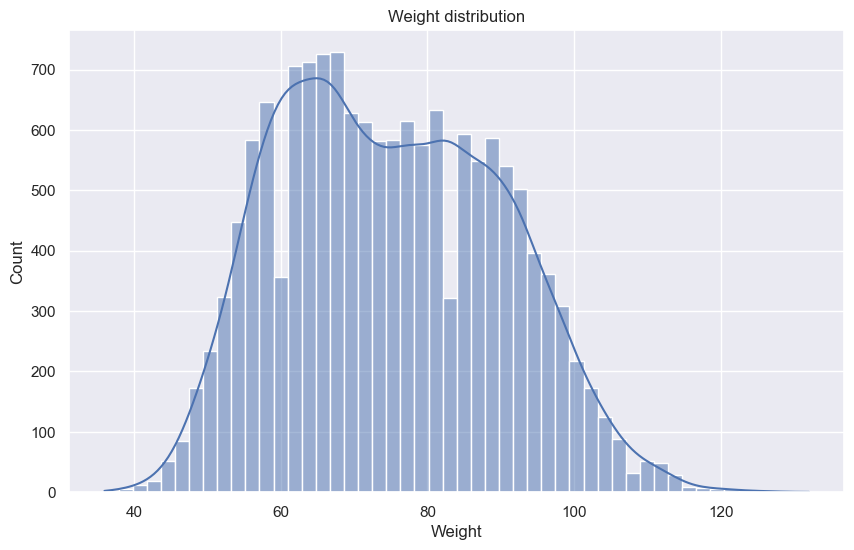

In [61]:
# distribution based on their `Weight`

plt.figure(figsize=(10,6))
sns.histplot(combined_data['Weight'], kde=True)
plt.title('Weight distribution')

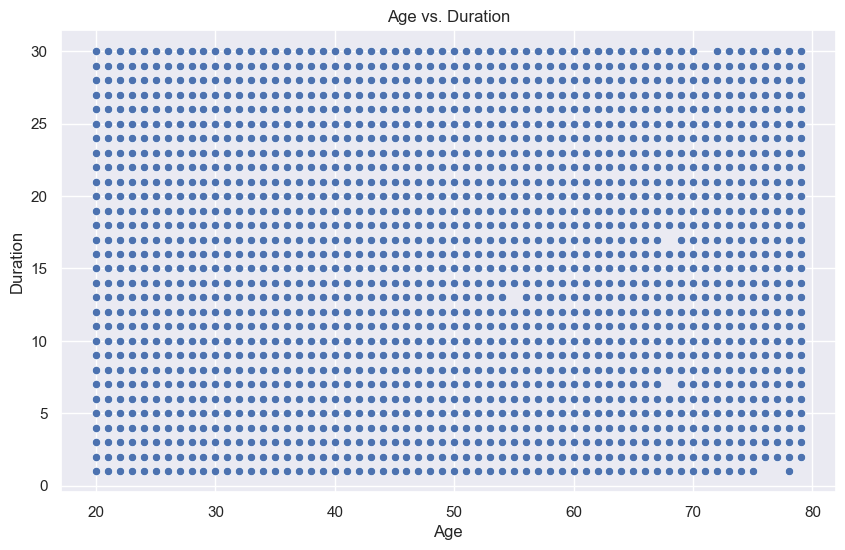

In [65]:
# scatter plot of Duration based on Age

plt.figure(figsize=(10,6))
sns.scatterplot(x='Age', y='Duration', data=combined_data)
plt.title('Age vs. Duration')
plt.xlabel('Age')
plt.ylabel('Duration')
plt.show()

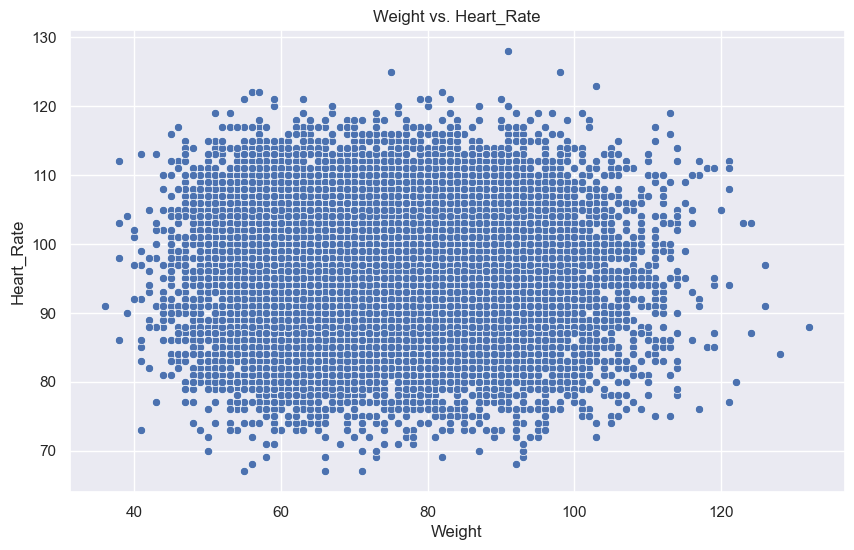

In [69]:
# scatter plot of Heart Rate based on Weight

plt.figure(figsize=(10,6))
sns.scatterplot(x='Weight', y='Heart_Rate', data=combined_data)
plt.title('Weight vs. Heart_Rate')
plt.xlabel('Weight')
plt.ylabel('Heart_Rate')
plt.show()

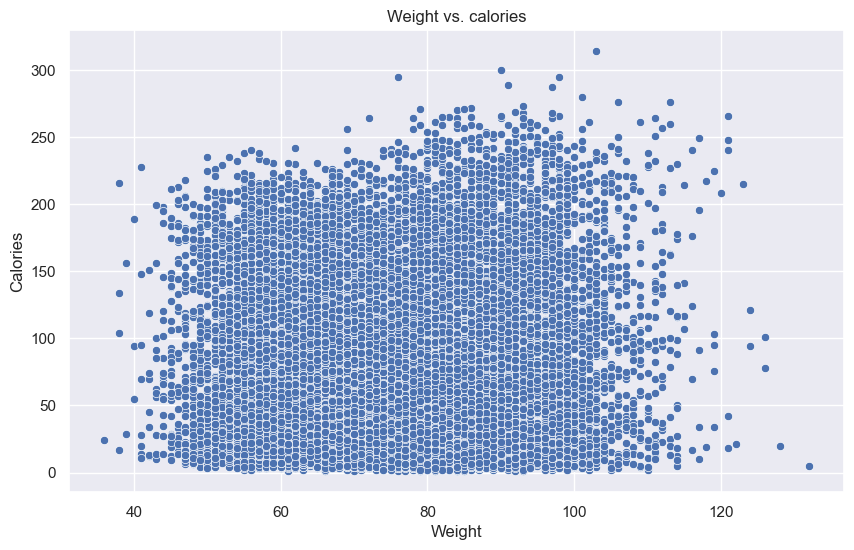

In [73]:
# scatter plot of Calories Burnt based on Weight

plt.figure(figsize=(10,6))
sns.scatterplot(x='Weight', y='Calories', data=combined_data)
plt.title('Weight vs. calories')
plt.xlabel('Weight')
plt.ylabel('Calories')
plt.show()

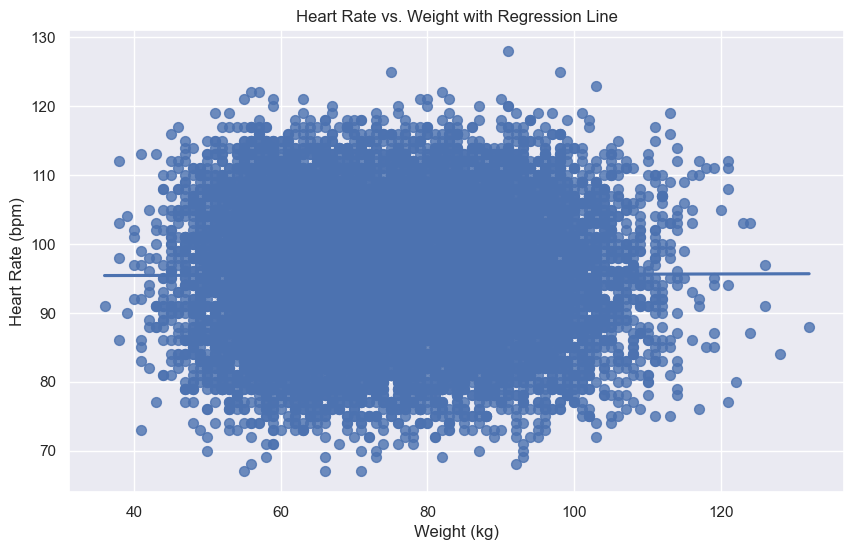

In [77]:
# Regression plot for Heart Rate vs. Weight
plt.figure(figsize=(10, 6))
sns.regplot(x='Weight', y='Heart_Rate', data=combined_data, ci=None, scatter_kws={'s':50})
plt.title('Heart Rate vs. Weight with Regression Line')
plt.xlabel('Weight (kg)')
plt.ylabel('Heart Rate (bpm)')
plt.show()

### Categorical distribution

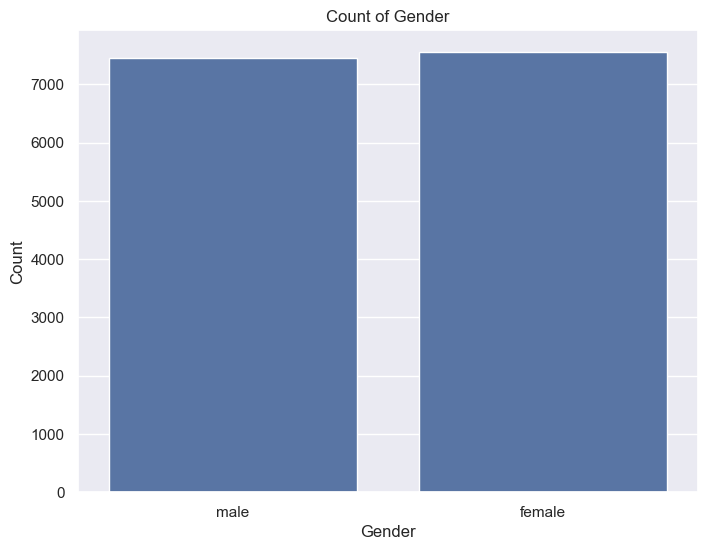

In [79]:
# Countplot for Gender
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=combined_data)
plt.title('Count of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

## Encoding categorical features

In [83]:
train = combined_data.replace({'Gender': {'male': 0, 'female': 1}})

C:\Users\Nazm\AppData\Local\Temp\ipykernel_672\1423401092.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train = combined_data.replace({'Gender': {'male': 0, 'female': 1}})


In [85]:
train.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,1,27,154.0,58.0,10.0,81.0,39.8,35.0


## Separating the features and the target

In [88]:
X = train.drop(columns='Calories', axis=1)
Y = train['Calories']